# THE BATTLE OF NEIGHBORHOODS

## Understanding the Neighborhoods of Delhi and recommending Neighbourhoods for Indian Restaurants

###### This is a Capstone Project submitted by Nishit Chaudhry in partial fulfillment of the requirements for the IBM Data Science Professional Certificate

## 1. Introduction

### 1.1 Background

Delhi, officially the National Capital Territory of Delhi (NCT), is a city and a union territory of India containing New Delhi, the capital of India. The NCT covers an area of 1,484 square kilometres (573 sq mi). According to the 2011 census, Delhi's city proper population was over 11 million, the second-highest in India after Mumbai, while the whole NCT's population was about 16.8 million. 

Delhi's urban area is now considered to extend beyond the NCT boundaries, and include the neighbouring satellite cities of Ghaziabad, Faridabad, Gurgaon and Noida in an area now called National Capital Region (NCR) and had an estimated 2016 population of over 26 million people, making it the world's second-largest urban area according to the United Nations.

Delhi is the second-wealthiest city in India after Mumbai and is home to 18 billionaires and 23,000 millionaires. Delhi ranks fifth among the Indian states and union territories in human development index. Delhi has the second-highest GDP per capita in India. It is one of the world's most polluted cities by particulate matter concentration.

### 1.2 Business Problem

This project will take a deeper look into the essence of this city which is known for its history, heritage, authentic food and diverse culture. We will explore the districts of Delhi by segmenting and clustering the districts based on its popular venues.

First half of this project will provide in detail analysis and visualisations at-a-glance to understand the different neighborhoods of each district and we will cluster these neighborhoods on the basis of top 5 venue categories found in each neighbourhood.

The next half will be related to restaurants where we will compare the neighbourhoods and segment them into clusters according to the types and frequencies of different food joints found in the neighbourhoods. This part will be of interest to stakeholders, businessmen, restaurant owner's who are either looking to expand their Indian restaurant chain to other neighbourhoods or planning to start a new Indian restaurant altogether. We will recommend neighbourhoods in Delhi that might be optimal for opening new Indian restaurants.



## 2. Data

### 2.1 Packages and Dependencies 
- Numpy
- Pandas
- Matplotlib
- Seaborn
- Sklearn
- Folium
- Geopy
- Requests
- Json

### 2.2 Datasets

The dataset used here will comprise the Boroughs, Neighborhoods, Latitude and Longitude of Delhi. The dataset will be downloaded from an external source for the same.

The longitude and latitude data will be used by the Foursquare API to help in exploring the neighborhood venues as well as to map the clusters on the map using the Folium package. The city venues will be compared on the basis of the Boroughs and Neighborhoods.

##### 1. Neighbourhoods of Delhi
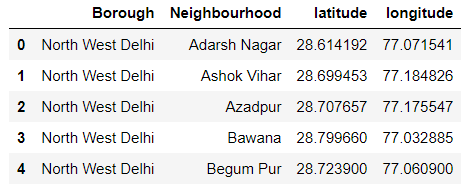

#####  2. Population of Delhi by Boroughs
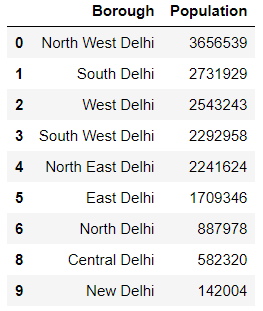

### 2.3 Foursquare API

Foursquare API has a database of more than 105 million places updated in real-time. It is a very engaging platform with details from the users who tips to the details of the venues and places of cities, states. This project will use Foursquare API as its prime source of data gathering.

Foursquare uses the Latitude and Longitude of the data to provide a json file with the details of the venues like name, category, latitude and longitude. Also, Foursquare API uses the Client ID, Client secret(which is basically a password) and the Version(a date based on which you will get the json file)


Let's import the packages and dependencies required for the project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import geopy
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
from sklearn.cluster import KMeans
%matplotlib inline
print('Libraries imported!')

Libraries imported!


Reading the Neighbourhood of Delhi data from an external source which is a csv file.

In [2]:
delhi_data = pd.read_csv('Neighborhood of Delhi.csv')
delhi_data.rename(columns={'Neighborhood':'Neighbourhood'}, inplace=True)
delhi_data.drop(columns = ['Unnamed: 0'], inplace=True)

In [3]:
delhi_data.head()

,Borough,Neighbourhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
4,North West Delhi,Begum Pur,28.723900,77.060900


In [4]:
delhi_data.Borough.unique()

array(['North West Delhi', 'North Delhi', 'North East Delhi',
       'Central Delhi', 'New Delhi', 'East Delhi', 'South Delhi',
       'South West Delhi', 'West Delhi'], dtype=object)

In [5]:
delhi_data.shape

(185, 4)

In [6]:
delhi_data.Borough.value_counts()

South Delhi         49
North Delhi         27
South West Delhi    21
West Delhi          20
East Delhi          19
North West Delhi    18
North East Delhi    13
New Delhi           10
Central Delhi        8
Name: Borough, dtype: int64

Using Geopy and Folium to map locations in the dataframe on Delhi map.

In [7]:
address = 'Delhi, IN'

geolocator = Nominatim(user_agent='DL_locator')
location = geolocator.geocode(address)
latitude_DL = location.latitude
longitude_DL = location.longitude
print('The Latitude and Longitude of Delhi are {} and {}'.format(latitude_DL, longitude_DL))

The Latitude and Longitude of Delhi are 28.6517178 and 77.2219388


In [8]:
map_DL = folium.Map(location=[latitude_DL, longitude_DL], zoom_start=11)

In [9]:
for lat, lng, borough, neighborhood in zip(delhi_data['latitude'], delhi_data['longitude'], delhi_data['Borough'], delhi_data['Neighbourhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_DL)  

map_DL

## 3. Methodology

In this project, we will explore the neighbourhoods of Delhi by taking a deeper look into its venue categories and places. First, we will get nearby venues of each Neighbourhood(185 to be exact) in the Boroughs. This step of the project will be completed with the help of Foursquare API. After which we will analyse the venues which results from the Foursquare data. After properly checking for the missing values in the external data, we will get dummies(one hot encoding) for each venue in the data preprocessing step and get the mean by grouping this data by Neighbourhood. Now, we will build a data frame containing the top 5 venues in each neighbourhood in terms of the frequency of their occurence.

This data is now ideal to be used to apply Unsupervised learning, in this case, KMeans clustering to get the segmentation of the data on the basis of the venues. We do this by first dropping the Neighbourhood column so only numerical data with all the venues are left to be inserted into the model. We will cluster this data into 5 clusters, hence k = 5 here. The data we have in the dataframe is unlabelled which indicates unsupervised nature of the data. Once we receive the cluster labels for each row, we will add back the Neighbourhood, Borough, Latitude and Longitude columns to the data which will help us map this dataframe to the Delhi map using the Folium package.

Once we have plotted the data, we will take a deeper look into the clusters to make sense of how the data is segmented into this cluster and what distinguishes them from each other. For this step we will plot each cluster into bar plots to highlight the venue category occuring in each cluster and as well as the most occuring venue categories to label these clusters. Okay, so to take a look at the cluster distribution at the Boroughs level, we will plot a box plot between clusters and boroughs.
After this to answer the second part of the objective i.e recommending neighbourhoods for Indian restaurants, we will move our focus to food restaurants in the neighbourhoods. For this, we will further filter our data and take only categories related to food joints/restaurants. Then we will plot bar plots and pie plots to visualize this data. Now, we will drop all the venue categories except Indian Restaurants to take a look at the distribution throughout the Boroughs.

Okay to include some external features as well in our analysis, we will use the population census of Delhi to take a look at the population distribution. This step is not necessary for the project, but it can highlight the x-factor for the population, i.e to see if some boroughs are more densely populated than others or not. This might be useful in overall understanding of the audience that might interest the stakeholders and businessmen in better understanding Delhi as a city and to make further optimum recommendations as well.

At last, we will come to the recommendation part. Here we will again cluster the data which we filtered earlier related to just food joints. We will again use KMeans clustering with 3 clusters this time to cluster the data. After this we will again try to make a sense of the clusters by plotting the barplots and we will try to label the clusters.


## 4. Analysis

Let's start our Exploratory Data Analysis of the Neighbourhoods and Boroughs of Delhi to understand the city better and ultimately recommend neighbourhoods optimum to start a new Indian Restaurants.

In [10]:
# @hidden_cell
CLIENT_ID = '153AJARQDUKXH2SA2SFU2ANNSH0H3TWQKE0FQEXDH0J5MQOU' # your Foursquare ID
CLIENT_SECRET = 'KHZ1JYV5H25AJWRPU4SSBWVEDU1WM3LA2SQZW3MKDW40YUDC' # your Foursquare Secret
VERSION = '20200531' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 153AJARQDUKXH2SA2SFU2ANNSH0H3TWQKE0FQEXDH0J5MQOU
CLIENT_SECRET:KHZ1JYV5H25AJWRPU4SSBWVEDU1WM3LA2SQZW3MKDW40YUDC


Getting the details of nearby venues of each neighbourhood in the dataframe.

In [11]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius = 500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT)
        
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
print('This might take a while......')
DL_venues = getNearbyVenues(names=delhi_data['Neighbourhood'],
                           latitudes = delhi_data['latitude'],
                           longitudes = delhi_data['longitude'])
print('Venues returned. Delhi venues table created!')

This might take a while......
Venues returned. Delhi venues table created!


In [13]:
DL_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,28.614192,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
1,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant
2,Ashok Vihar,28.699453,77.184826,Bakers Stop,28.700495,77.188716,Bakery
3,Ashok Vihar,28.699453,77.184826,Invitation Banquet,28.696018,77.185953,Diner
4,Ashok Vihar,28.699453,77.184826,Gola Northend,28.701242,77.189288,Indian Restaurant


### Part-1: Understanding the Neighbourhoods of Delhi

In [14]:
Neighborhood_counts = DL_venues.groupby('Neighbourhood').count()
Neighborhood_counts.head()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Adarsh Nagar,1,1,1,1,1,1
Alaknanda,10,10,10,10,10,10
Anand Vihar,8,8,8,8,8,8
Ashok Nagar,5,5,5,5,5,5
Ashok Vihar,4,4,4,4,4,4


In [15]:
DL_df = DL_venues.copy()
DL_df = pd.merge(DL_df, delhi_data[['Neighbourhood', 'Borough']], left_on='Neighbourhood', right_on='Neighbourhood')
DL_df.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
0,Adarsh Nagar,28.614192,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant,North West Delhi
1,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant,North West Delhi
2,Ashok Vihar,28.699453,77.184826,Bakers Stop,28.700495,77.188716,Bakery,North West Delhi
3,Ashok Vihar,28.699453,77.184826,Invitation Banquet,28.696018,77.185953,Diner,North West Delhi
4,Ashok Vihar,28.699453,77.184826,Gola Northend,28.701242,77.189288,Indian Restaurant,North West Delhi


In [16]:
Borough_counts = DL_df.groupby('Borough').count().reset_index()
Borough_counts

,Borough,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Delhi,58,58,58,58,58,58,58
1,East Delhi,77,77,77,77,77,77,77
2,New Delhi,148,148,148,148,148,148,148
3,North Delhi,191,191,191,191,191,191,191
4,North East Delhi,31,31,31,31,31,31,31
5,North West Delhi,50,50,50,50,50,50,50
6,South Delhi,529,529,529,529,529,529,529
7,South West Delhi,139,139,139,139,139,139,139
8,West Delhi,139,139,139,139,139,139,139


In [17]:
DL_df.Borough.unique()

array(['North West Delhi', 'North Delhi', 'Central Delhi', 'South Delhi',
       'East Delhi', 'North East Delhi', 'New Delhi', 'South West Delhi',
       'West Delhi'], dtype=object)

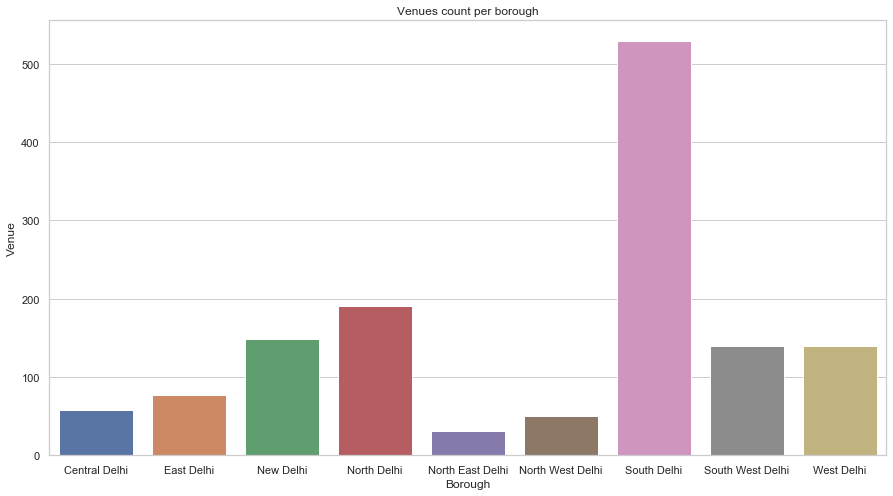

In [18]:
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.barplot(x=Borough_counts.Borough, y=Borough_counts.Venue, data=Borough_counts)
plt.title('Venues count per borough')
plt.show()

In [19]:
DL_onehot = pd.get_dummies(DL_venues[['Venue Category']], prefix="", prefix_sep="")
DL_onehot['Neighbourhood']= DL_venues['Neighbourhood']
DL_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Women's Store,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adarsh Nagar
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ashok Vihar
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ashok Vihar
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ashok Vihar
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ashok Vihar


In [20]:
DL_grouped = DL_onehot.groupby('Neighbourhood').mean().reset_index()
DL_grouped = DL_grouped.round(2)
DL_grouped.head()

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,...,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Women's Store
0,Adarsh Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaknanda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Anand Vihar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ashok Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ashok Vihar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here, we will return the 5 most common venue in each Neighbourhood.

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [22]:
num_top_venues = 5
    
indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = DL_grouped['Neighbourhood']

for ind in np.arange(DL_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(DL_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adarsh Nagar,Indian Restaurant,Women's Store,Food & Drink Shop,Garden,Gaming Cafe
1,Alaknanda,Indian Restaurant,BBQ Joint,Pizza Place,Steakhouse,Middle Eastern Restaurant
2,Anand Vihar,Indian Restaurant,Soup Place,Clothing Store,Pizza Place,Furniture / Home Store
3,Ashok Nagar,Fast Food Restaurant,Ice Cream Shop,North Indian Restaurant,Metro Station,Women's Store
4,Ashok Vihar,Indian Restaurant,Diner,Bakery,Food & Drink Shop,Garden


In [23]:
neighbourhoods_venues_sorted.dtypes

Neighbourhood            object
1st Most Common Venue    object
2nd Most Common Venue    object
3rd Most Common Venue    object
4th Most Common Venue    object
5th Most Common Venue    object
dtype: object

Using Kmeans clustering to cluster the Neighbourhoods based on occurance of common venues.

In [24]:
kclusters = 5

DL_grouped_clustering = DL_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DL_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([4, 4, 4, 2, 4, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 4, 4, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 0, 3, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 4,
       2, 2, 2, 2, 4, 4, 4, 4, 0, 2, 2, 2, 4, 2, 0, 0, 2, 1, 1, 3, 2, 4,
       2, 2, 2, 2, 2, 4, 1, 3, 2, 2, 2, 2, 0, 2, 4, 4, 2, 4, 4, 2, 2, 4,
       4, 0, 2, 2, 4, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 2, 3, 0, 2, 2, 3, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 4, 1, 1])

In [25]:
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

DL_merged = delhi_data.copy()

DL_merged = DL_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

DL_merged.head()

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.614192,77.071541,4.0,Indian Restaurant,Women's Store,Food & Drink Shop,Garden,Gaming Cafe
1,North West Delhi,Ashok Vihar,28.699453,77.184826,4.0,Indian Restaurant,Diner,Bakery,Food & Drink Shop,Garden
2,North West Delhi,Azadpur,28.707657,77.175547,2.0,Pool Hall,Bus Station,Restaurant,Women's Store,Food
3,North West Delhi,Bawana,28.799660,77.032885,2.0,Playground,Food,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop
4,North West Delhi,Begum Pur,28.723900,77.060900,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
DL_merged = DL_merged.dropna()
Total_NaN = DL_merged.isnull().sum()
Total_NaN

Borough                  0
Neighbourhood            0
latitude                 0
longitude                0
Cluster_Labels           0
1st Most Common Venue    0
2nd Most Common Venue    0
3rd Most Common Venue    0
4th Most Common Venue    0
5th Most Common Venue    0
dtype: int64

In [27]:
DL_merged['Cluster_Labels'] = DL_merged['Cluster_Labels'].astype(int) 

In [28]:
DL_merged.head()

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.614192,77.071541,4,Indian Restaurant,Women's Store,Food & Drink Shop,Garden,Gaming Cafe
1,North West Delhi,Ashok Vihar,28.699453,77.184826,4,Indian Restaurant,Diner,Bakery,Food & Drink Shop,Garden
2,North West Delhi,Azadpur,28.707657,77.175547,2,Pool Hall,Bus Station,Restaurant,Women's Store,Food
3,North West Delhi,Bawana,28.799660,77.032885,2,Playground,Food,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop
5,North West Delhi,Dhaka,28.708000,77.205500,2,ATM,Train Station,Furniture / Home Store,Pizza Place,Eastern European Restaurant


In [29]:
DL_merged.Cluster_Labels.value_counts()

2    104
4     38
0     13
3      9
1      8
Name: Cluster_Labels, dtype: int64

Mapping the clusters on Delhi map.

In [30]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude_DL, longitude_DL], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(DL_merged['latitude'], DL_merged['longitude'], DL_merged['Neighbourhood'], DL_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ', Cluster - ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Here we will explore the clustered data and find out the most occuring venue in each cluster to get an idea of the clustering.

In [31]:
clusters = pd.merge(DL_onehot.groupby('Neighbourhood').sum(),DL_merged[['Neighbourhood','Cluster_Labels']],left_on='Neighbourhood', right_on='Neighbourhood',how='inner')
clusters = clusters.iloc[:,1:].groupby('Cluster_Labels').sum().transpose()
clusters.head()

Cluster_Labels,0,1,2,3,4
ATM,0,0,13,16,1
Accessories Store,1,0,0,0,0
Afghan Restaurant,0,0,9,0,0
Airport,1,0,1,0,0
American Restaurant,1,0,8,0,0


In [32]:
def plot_bar(clusternumber):
    sns.set(style="whitegrid",rc={'figure.figsize':(24,10)})
    df = clusters[[clusternumber]].drop(clusters[[clusternumber]][clusters[clusternumber]==0].index)
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

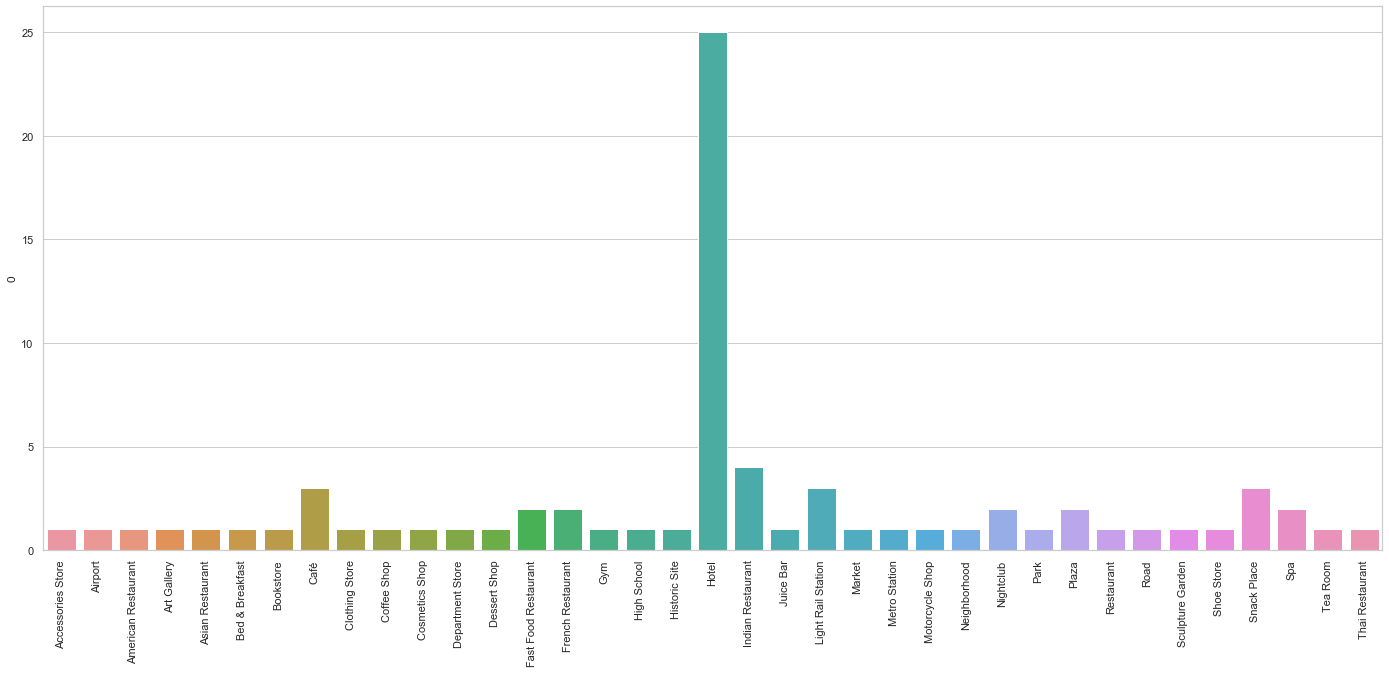

In [33]:
plot_bar(0)

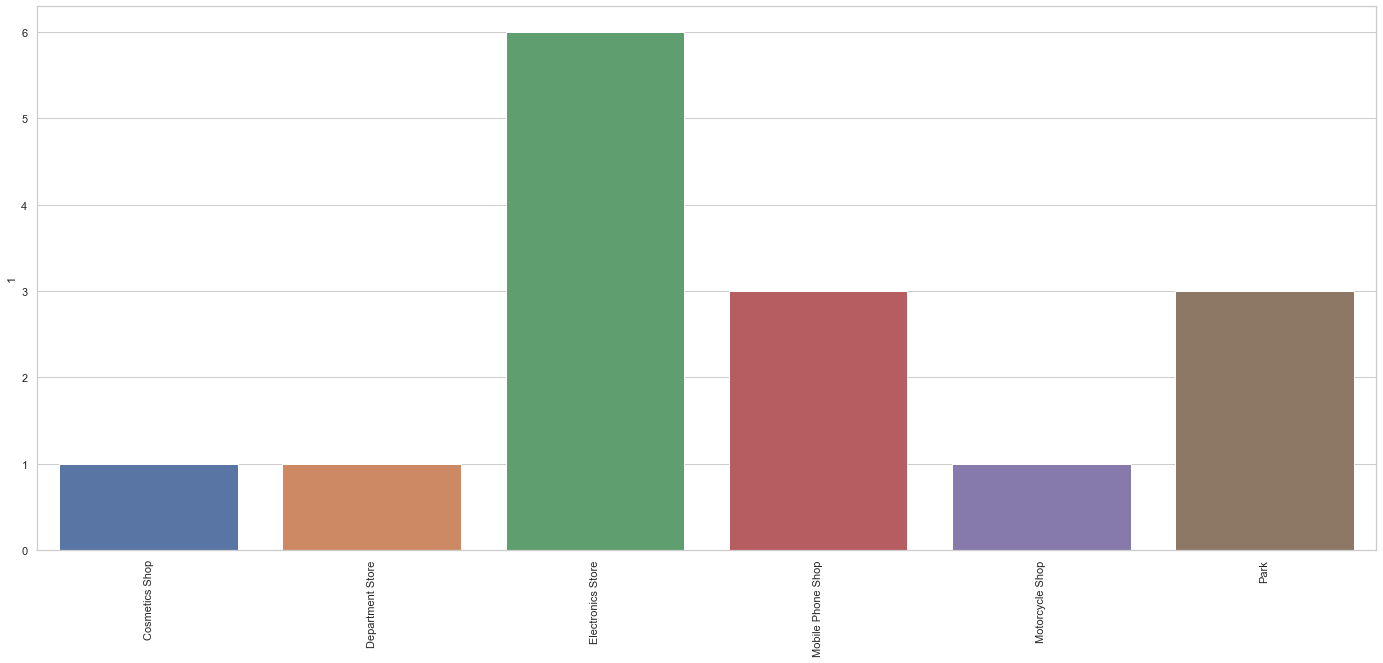

In [34]:
plot_bar(1)

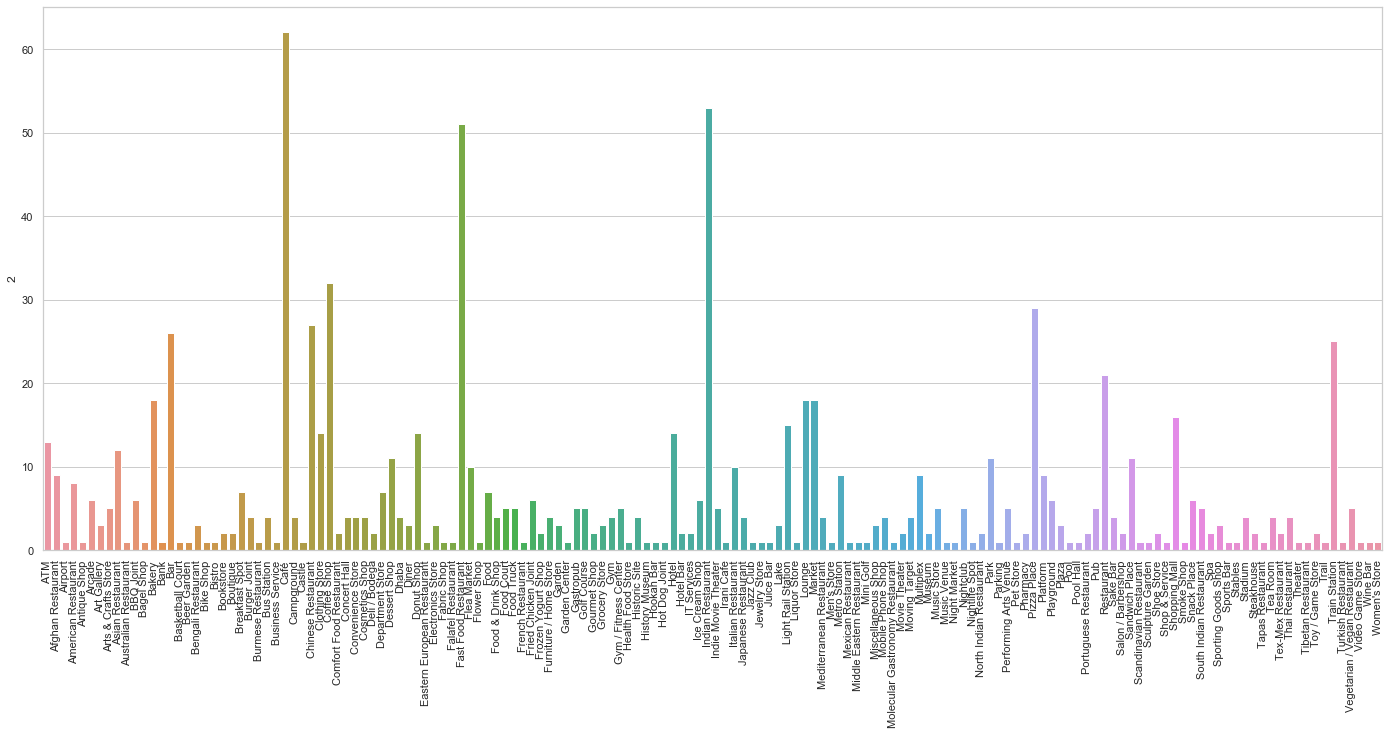

In [35]:
plot_bar(2)

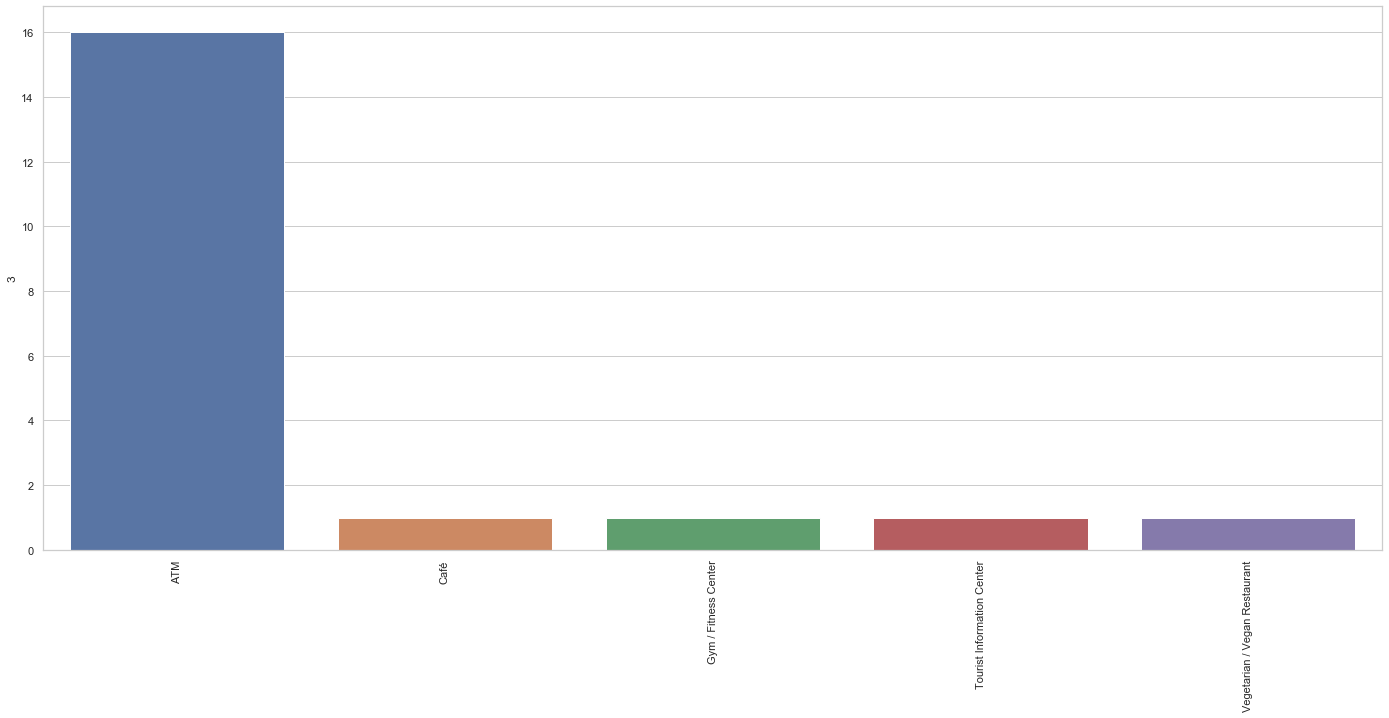

In [36]:
plot_bar(3)

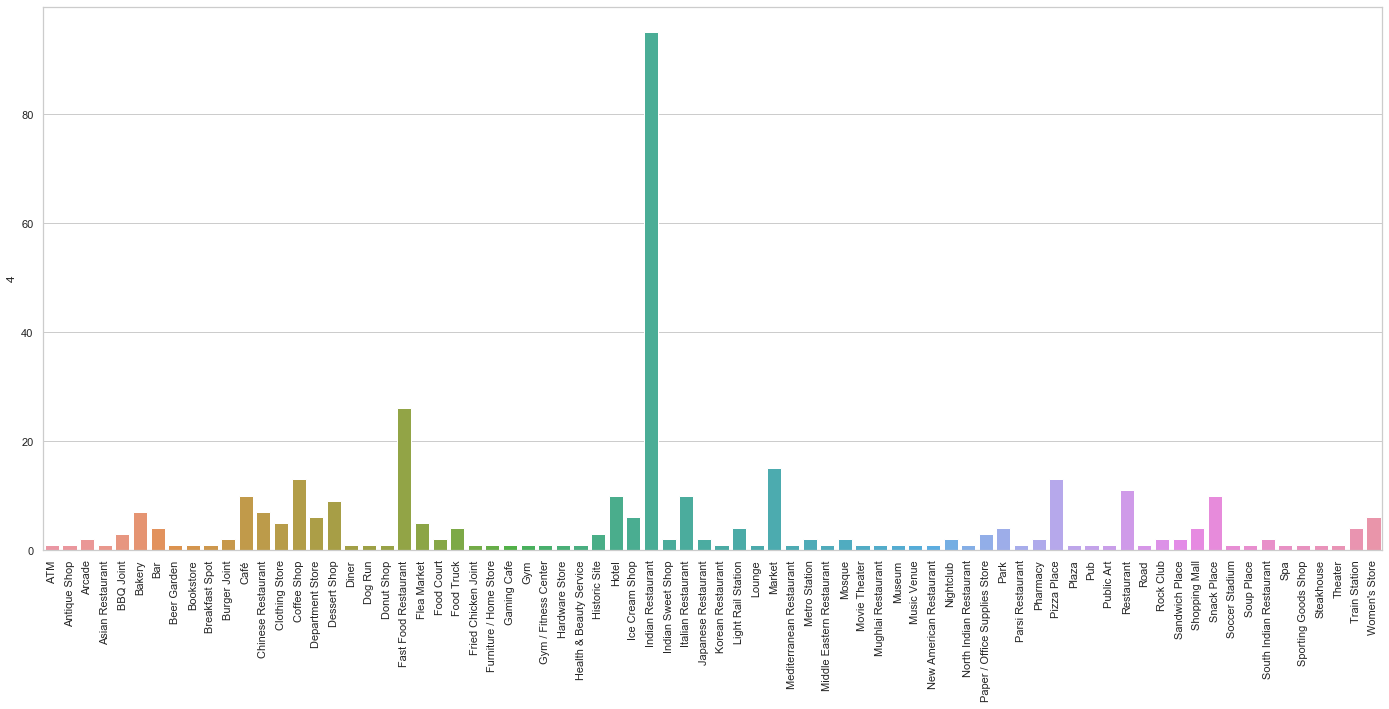

In [37]:
plot_bar(4)

As we can infer from the bar chats, cluster 1 and cluster 4 have neighbourhoods with the highest number of Indian restaurants.

Now, we will further explore the Boroughs and Neighbourhoods to get in depth knowledge of the distributions of food joints which include Indian Restaurants, Chinese Restaurants, Pizza places, Sandwhich places and so on.

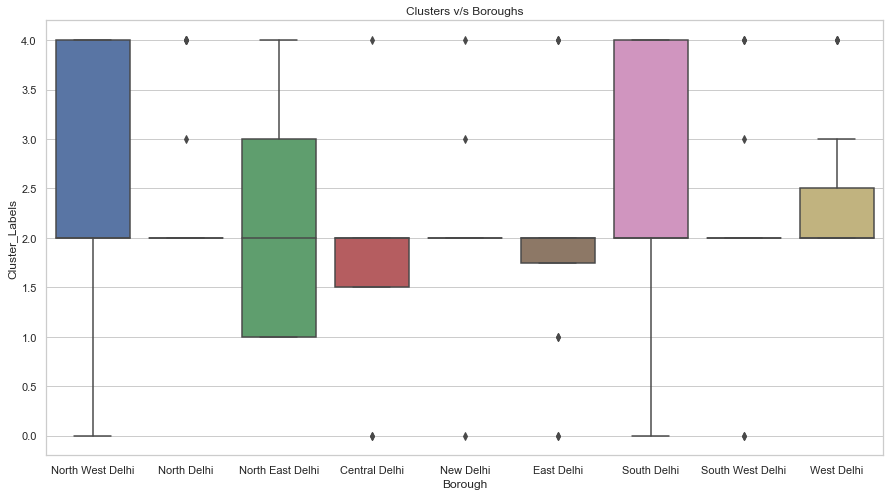

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(x=DL_merged.Borough, y=DL_merged.Cluster_Labels)
plt.title('Clusters v/s Boroughs')
plt.show()

In [39]:
cluster_data = DL_df.copy() 

In [40]:
cluster_data = pd.merge(cluster_data, DL_merged[['Neighbourhood','Cluster_Labels']], left_on='Neighbourhood', right_on='Neighbourhood')
cluster_data.shape

(1558, 9)

In [41]:
cluster_data.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough,Cluster_Labels
0,Adarsh Nagar,28.614192,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant,North West Delhi,4
1,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant,North West Delhi,4
2,Ashok Vihar,28.699453,77.184826,Bakers Stop,28.700495,77.188716,Bakery,North West Delhi,4
3,Ashok Vihar,28.699453,77.184826,Invitation Banquet,28.696018,77.185953,Diner,North West Delhi,4
4,Ashok Vihar,28.699453,77.184826,Gola Northend,28.701242,77.189288,Indian Restaurant,North West Delhi,4


In [42]:
cluster_data.groupby('Cluster_Labels').count()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
Cluster_Labels,,,,,,,,
0,75,75,75,75,75,75,75,75
1,15,15,15,15,15,15,15,15
2,1030,1030,1030,1030,1030,1030,1030,1030
3,24,24,24,24,24,24,24,24
4,414,414,414,414,414,414,414,414


### Part - 2 : Recommending Neighbourhoods for new Indian Restaurants 

In [75]:
foodresdata = DL_df.copy()
foodresdata.drop(foodresdata[~foodresdata['Venue Category'].isin(
    ['Restaurant', 
     'Pizza Place', 
     'Afghan Restaurant',
     'American Restaurant',
     'Fast Food Restaurant',
     'Dhaba',
     'Thai Restaurant',
     'South Indian Restaurant',
     'Food & Drink Shop',
     'Comfort Food Restaurant',
     'Steakhouse',
     'Gourmet Shop',
     'Bengali Restaurant', 
     'Japanese Restaurant',
     'Italian Restaurant',
     'Mediterranean Restaurant', 
     'Chinese Restaurant', 
     'BBQ Joint',
     'Hot Dog Joint',
     'Food',
     'Diner',
     'Portuguese Restaurant', 
     'Eastern European Restaurant',
     'Mexican Restaurant',
     'French Restaurant',
     'Snack Place', 
     'Sandwich Place',
     'Indian Restaurant', 
     'North Indian Restaurant', 
     'Vegetarian / Vegan Restaurant'])].index, inplace=True)

In [76]:
foodresdata.reset_index(drop=True, inplace=True)
foodresdata.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
0,Adarsh Nagar,28.614192,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant,North West Delhi
1,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant,North West Delhi
2,Ashok Vihar,28.699453,77.184826,Invitation Banquet,28.696018,77.185953,Diner,North West Delhi
3,Ashok Vihar,28.699453,77.184826,Gola Northend,28.701242,77.189288,Indian Restaurant,North West Delhi
4,Azadpur,28.707657,77.175547,Tulip Banquet,28.704523,77.172441,Restaurant,North West Delhi


In [77]:
foodresdata['Venue Category'].unique()

array(['Indian Restaurant', 'Diner', 'Restaurant', 'Pizza Place',
       'Snack Place', 'Chinese Restaurant', 'Fast Food Restaurant',
       'Food', 'Afghan Restaurant', 'Italian Restaurant',
       'American Restaurant', 'Food & Drink Shop', 'Dhaba',
       'Vegetarian / Vegan Restaurant', 'Sandwich Place',
       'South Indian Restaurant', 'North Indian Restaurant',
       'Portuguese Restaurant', 'BBQ Joint', 'Japanese Restaurant',
       'Bengali Restaurant', 'French Restaurant',
       'Mediterranean Restaurant', 'Mexican Restaurant',
       'Eastern European Restaurant', 'Steakhouse', 'Hot Dog Joint',
       'Thai Restaurant', 'Comfort Food Restaurant', 'Gourmet Shop'],
      dtype=object)

In [78]:
foodresdata.shape

(488, 8)

In [79]:
grouped_restaurants = foodresdata.groupby('Borough').count().reset_index()

Now we will observe the distribution of food joints per Boroughs.

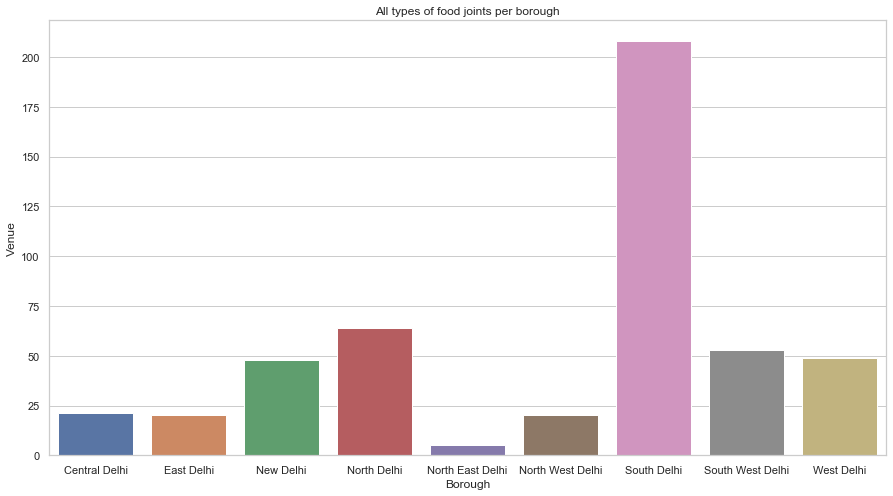

In [80]:
plt.figure(figsize=(15,8))
sns.barplot(x=grouped_restaurants.Borough, y=grouped_restaurants.Venue, data=foodresdata)
plt.title('All types of food joints per borough')
plt.show()

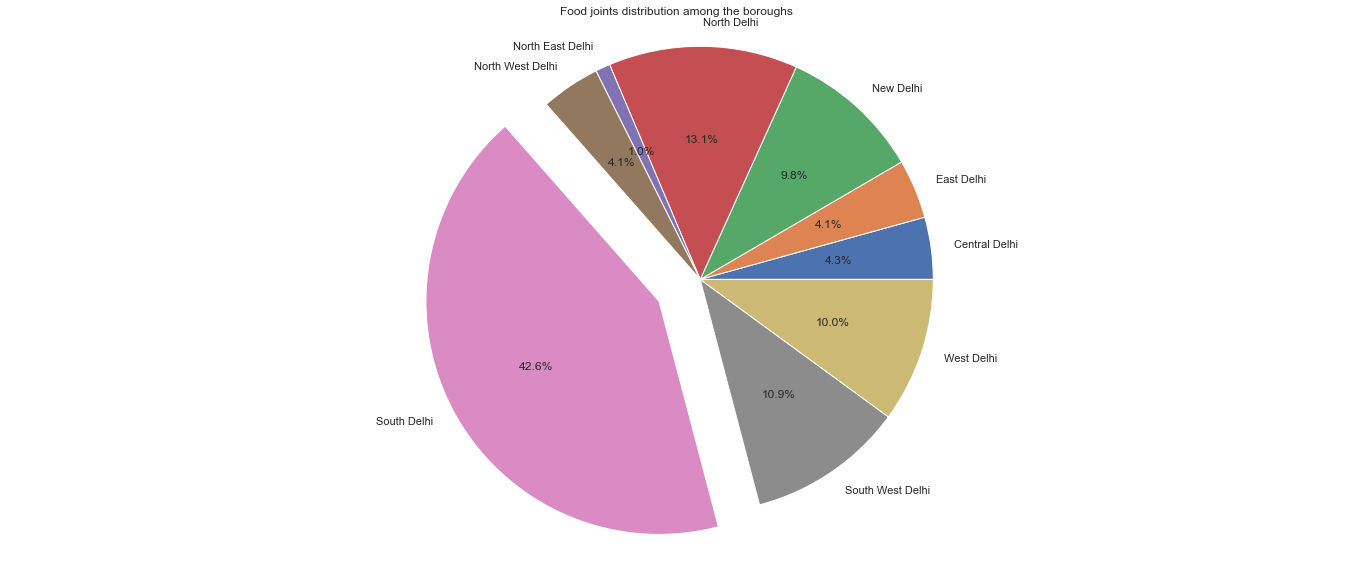

In [81]:
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0, 0, 0.2, 0, 0)
ax1.pie(grouped_restaurants.Venue, explode=explode, labels=grouped_restaurants.Borough, autopct='%1.1f%%',
         startangle=0)
ax1.axis('equal')
plt.title('Food joints distribution among the boroughs')
plt.show()

We can infer from above two charts that South Delhi accounts for most overall food venues as much as 42.6% in Delhi based on our data.

Now, we will channel our attention towards Indian Restaurants distribution in Delhi Boroughs.

In [82]:
indianresdata = foodresdata.copy()
indianresdata.drop(indianresdata[~indianresdata['Venue Category'].isin(['Indian Restaurant'])].index, inplace=True)
indianresdata.reset_index(drop=True, inplace=True)
indianresdata.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
0,Adarsh Nagar,28.614192,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant,North West Delhi
1,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant,North West Delhi
2,Ashok Vihar,28.699453,77.184826,Gola Northend,28.701242,77.189288,Indian Restaurant,North West Delhi
3,Kohat Enclave,28.698041,77.140539,Bobby Punjabi Rasoi,28.699222,77.139396,Indian Restaurant,North West Delhi
4,Kohat Enclave,28.698041,77.140539,Peshawari,28.699012,77.139020,Indian Restaurant,North West Delhi


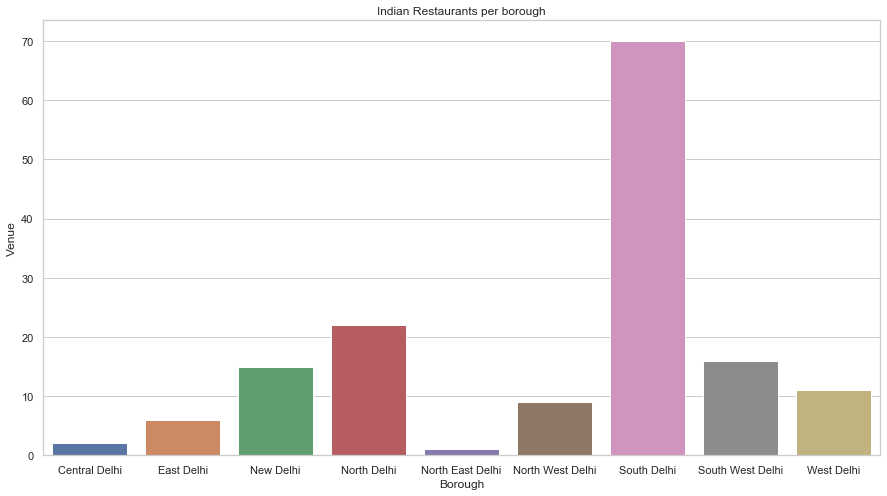

In [83]:
indianresdata = indianresdata.groupby('Borough').count().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=indianresdata.Borough, y=indianresdata.Venue, data=indianresdata)
plt.title('Indian Restaurants per borough')
plt.show()

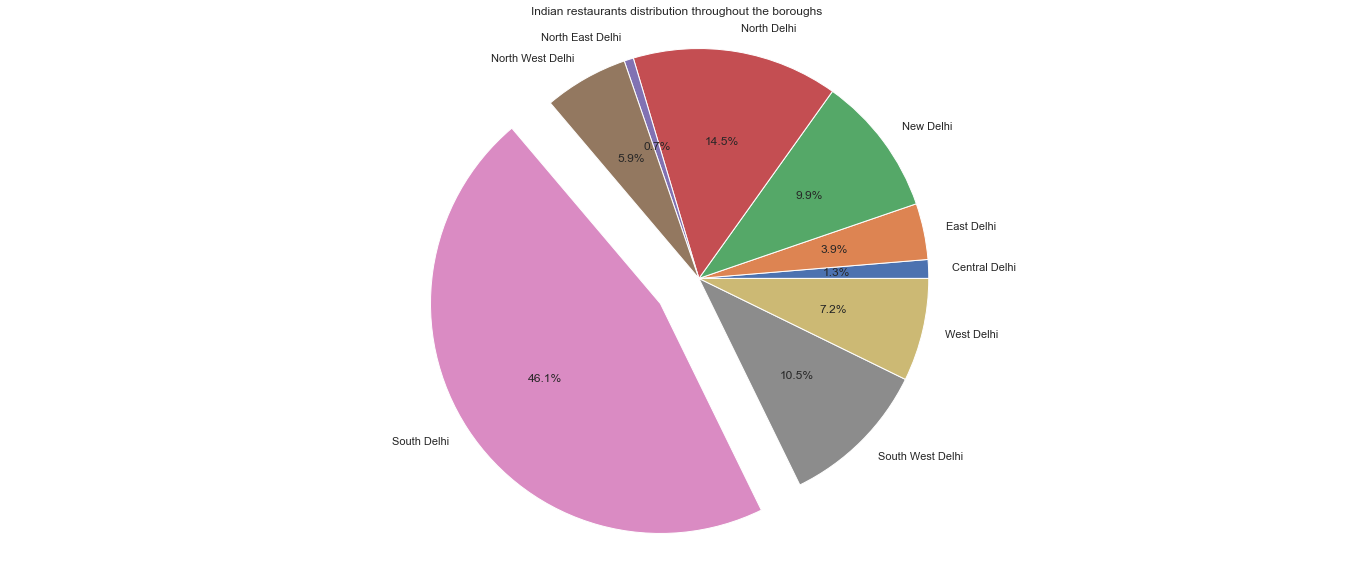

In [84]:
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0, 0, 0.2, 0, 0)
ax1.pie(indianresdata.Venue, explode=explode, labels=indianresdata.Borough, autopct='%1.1f%%',
         startangle=0)
ax1.axis('equal')
plt.title('Indian restaurants distribution throughout the boroughs')
plt.show()

After going through above visualisations, we can again infer that South Delhi comprises of most Indian Restaurants reaching nearly 50%.

Now we will take a look at the population distribution in Delhi.

In [85]:
pop_url = 'https://www.census2011.co.in/census/state/districtlist/delhi.html'

pop_data = pd.read_html(pop_url)
pop_data = pop_data[0]
pop_data = pop_data.drop(7)
pop_data = pop_data.iloc[:, 1:4]
pop_data = pop_data.drop(columns='Sub-Districts')
pop_data = pop_data.rename(columns={'District':'Borough'})
pop_data['Population'] = pop_data['Population'].astype(int)
pop_data

,Borough,Population
0,North West Delhi,3656539
1,South Delhi,2731929
2,West Delhi,2543243
3,South West Delhi,2292958
4,North East Delhi,2241624
5,East Delhi,1709346
6,North Delhi,887978
8,Central Delhi,582320
9,New Delhi,142004


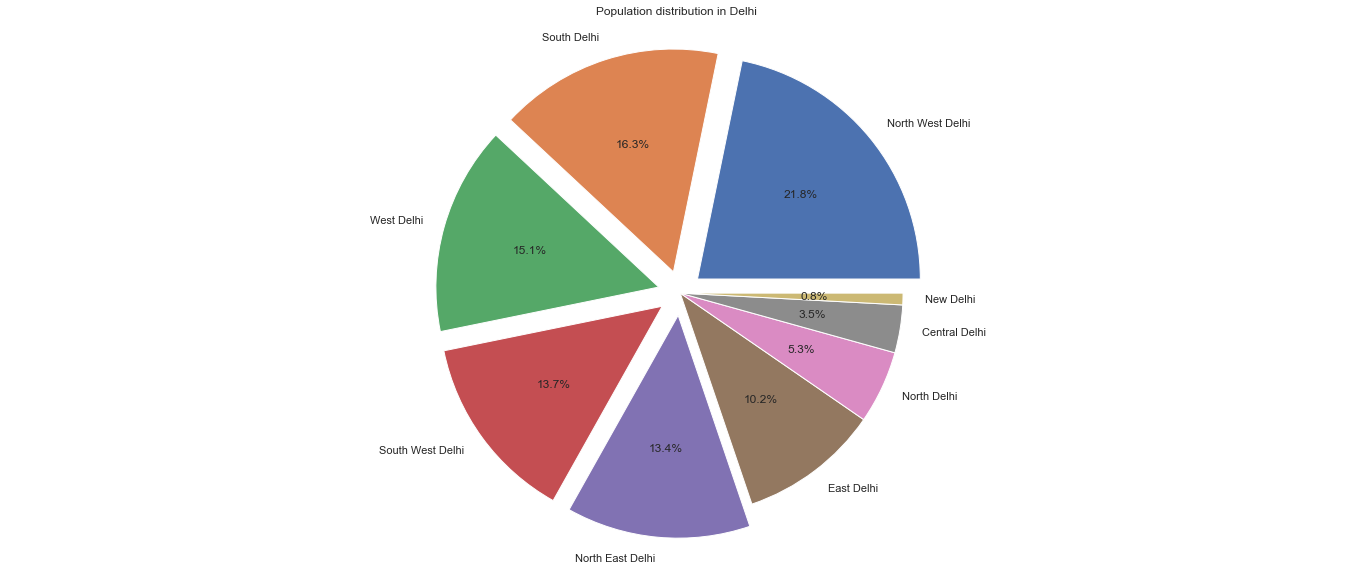

In [86]:
fig1, ax1 = plt.subplots()
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0)
ax1.pie(pop_data.Population, explode=explode, labels=pop_data.Borough, autopct='%1.1f%%',
         startangle=0)
ax1.axis('equal')
plt.title('Population distribution in Delhi')
plt.show()

We can see from the chart above that only 3 Boroughs i.e West Delhi, South Delhi, North West Delhi comprises of more that half the population of Delhi. Also, we can take into account the other two Boroughs i.e South West Delhi and North East Delhi including which in total accounts for more than 70% of the total population.

In [87]:
foodresdata_onehot = pd.get_dummies(foodresdata[['Venue Category']], prefix="", prefix_sep="")
foodresdata_onehot['Neighbourhood']= foodresdata['Neighbourhood']
foodresdata_onehot.head()

,Afghan Restaurant,American Restaurant,BBQ Joint,Bengali Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dhaba,Diner,Eastern European Restaurant,Fast Food Restaurant,...,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Snack Place,South Indian Restaurant,Steakhouse,Thai Restaurant,Vegetarian / Vegan Restaurant,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adarsh Nagar
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ashok Vihar
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Ashok Vihar
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ashok Vihar
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Azadpur


In [88]:
foodresdata_grp = foodresdata_onehot.groupby('Neighbourhood').mean().reset_index()
foodresdata_grp = foodresdata_grp.round(2)
foodresdata_grp.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,BBQ Joint,Bengali Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dhaba,Diner,Eastern European Restaurant,...,North Indian Restaurant,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Snack Place,South Indian Restaurant,Steakhouse,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Adarsh Nagar,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
1,Alaknanda,0.0,0.0,0.29,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.14,0.0,0.14,0.0,0.0,0.0,0.14,0.0,0.0
2,Anand Vihar,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.33,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
3,Ashok Nagar,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.33,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
4,Ashok Vihar,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.33,0.0,...,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0


In [89]:
foodresdata_grp.shape

(107, 31)

In [90]:
num_top_venues = 5
    
indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

restaurants_sorted = pd.DataFrame(columns=columns)
restaurants_sorted['Neighbourhood'] = foodresdata_grp['Neighbourhood']

for ind in np.arange(foodresdata_grp.shape[0]):
    restaurants_sorted.iloc[ind, 1:] = return_most_common_venues(foodresdata_grp.iloc[ind, :], num_top_venues)

restaurants_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adarsh Nagar,Indian Restaurant,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant,BBQ Joint
1,Alaknanda,BBQ Joint,Indian Restaurant,Pizza Place,Steakhouse,Restaurant
2,Anand Vihar,Indian Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant
3,Ashok Nagar,Fast Food Restaurant,North Indian Restaurant,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant
4,Ashok Vihar,Indian Restaurant,Diner,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant


In [91]:
kclusters = 3

restaurant_grouped_clustering = foodresdata_grp.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(restaurant_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1,
       2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2])

In [92]:
restaurants_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

restaurants_merged = delhi_data.copy()

restaurants_merged = restaurants_merged.join(restaurants_sorted.set_index('Neighbourhood'), on='Neighbourhood')

restaurants_merged.head()

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.614192,77.071541,2.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant,BBQ Joint
1,North West Delhi,Ashok Vihar,28.699453,77.184826,2.0,Indian Restaurant,Diner,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant
2,North West Delhi,Azadpur,28.707657,77.175547,1.0,Restaurant,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant,BBQ Joint
3,North West Delhi,Bawana,28.799660,77.032885,NaN,NaN,NaN,NaN,NaN,NaN
4,North West Delhi,Begum Pur,28.723900,77.060900,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
restaurants_merged = restaurants_merged.dropna()
Total_NaN = restaurants_merged.isnull().sum()
Total_NaN

Borough                  0
Neighbourhood            0
latitude                 0
longitude                0
Cluster_Labels           0
1st Most Common Venue    0
2nd Most Common Venue    0
3rd Most Common Venue    0
4th Most Common Venue    0
5th Most Common Venue    0
dtype: int64

In [94]:
restaurants_merged['Cluster_Labels'] = restaurants_merged['Cluster_Labels'].astype(int)
restaurants_merged.reset_index(drop=True, inplace=True)
restaurants_merged.head()

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.614192,77.071541,2,Indian Restaurant,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant,BBQ Joint
1,North West Delhi,Ashok Vihar,28.699453,77.184826,2,Indian Restaurant,Diner,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant
2,North West Delhi,Azadpur,28.707657,77.175547,1,Restaurant,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant,BBQ Joint
3,North West Delhi,Dhaka,28.708000,77.205500,0,Pizza Place,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant,BBQ Joint
4,North West Delhi,Kohat Enclave,28.698041,77.140539,2,Indian Restaurant,Snack Place,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant


In [95]:
restaurants_merged.shape

(114, 10)

In [96]:
restaurants_merged.Cluster_Labels.value_counts()

2    56
1    50
0     8
Name: Cluster_Labels, dtype: int64

In [97]:
map_clusters = folium.Map(location=[latitude_DL, longitude_DL], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(restaurants_merged['latitude'], restaurants_merged['longitude'], restaurants_merged['Neighbourhood'], restaurants_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ', Cluster - ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [98]:
clusters = pd.merge(foodresdata_onehot.groupby('Neighbourhood').sum(),restaurants_merged[['Neighbourhood','Cluster_Labels']],left_on='Neighbourhood', right_on='Neighbourhood',how='inner')
clusters = clusters.iloc[:,1:].groupby('Cluster_Labels').sum().transpose()
clusters.head()

Cluster_Labels,0,1,2
Afghan Restaurant,0,17,0
American Restaurant,0,2,7
BBQ Joint,0,3,6
Bengali Restaurant,0,3,0
Chinese Restaurant,0,13,21


In [99]:
def plot_bar(clusternumber):
    sns.set(style="whitegrid",rc={'figure.figsize':(24,10)})
    df = clusters[[clusternumber]].drop(clusters[[clusternumber]][clusters[clusternumber]==0].index)
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

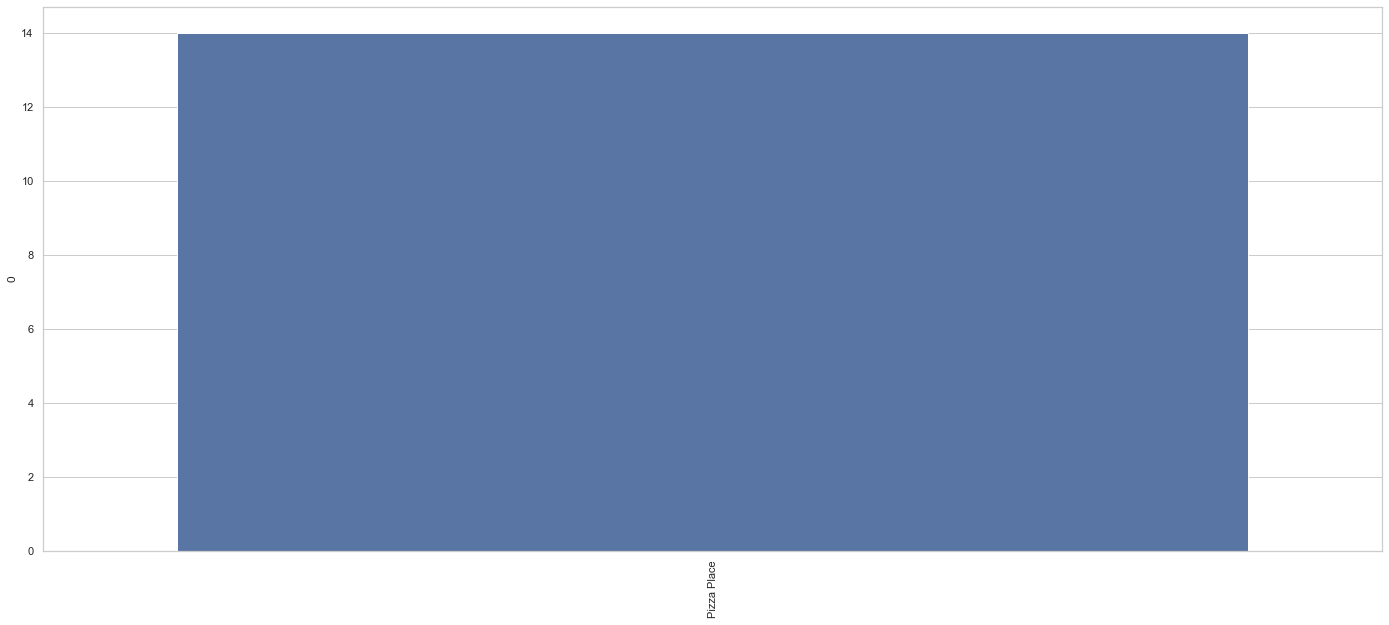

In [100]:
plot_bar(0)

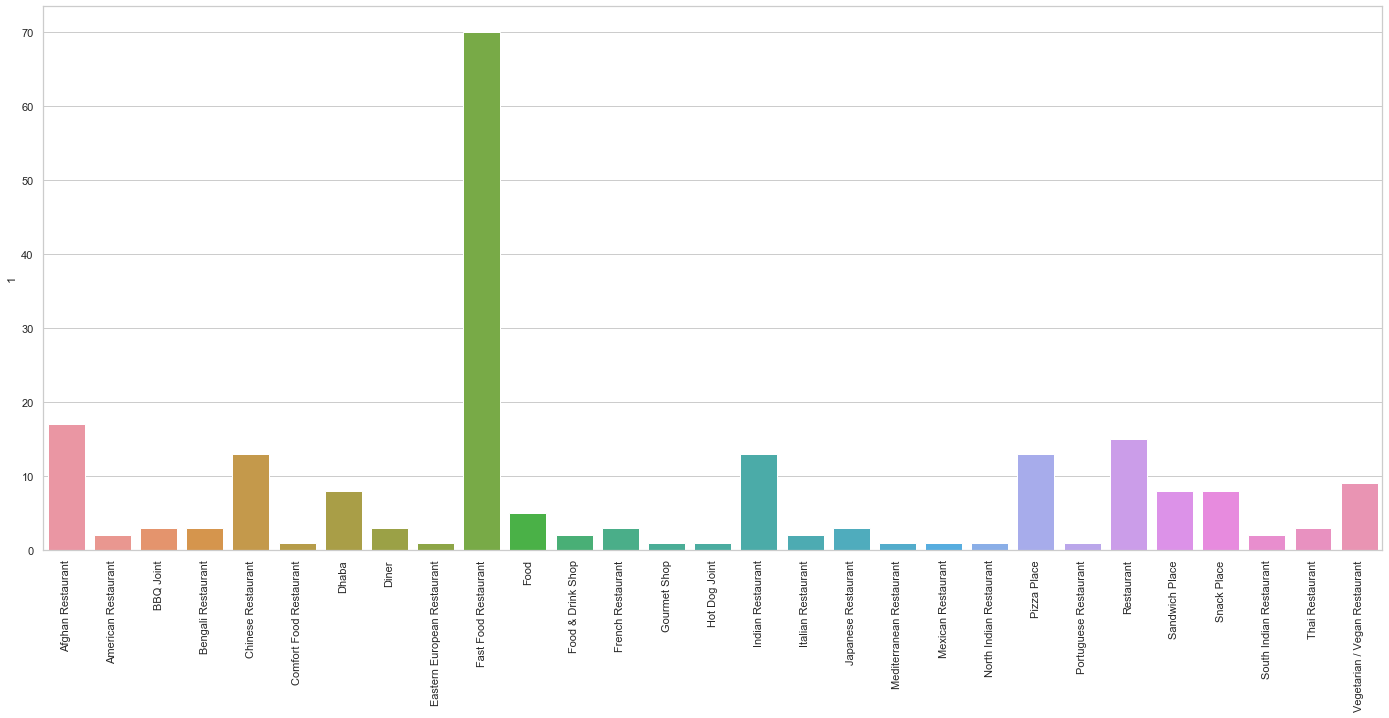

In [101]:
plot_bar(1)

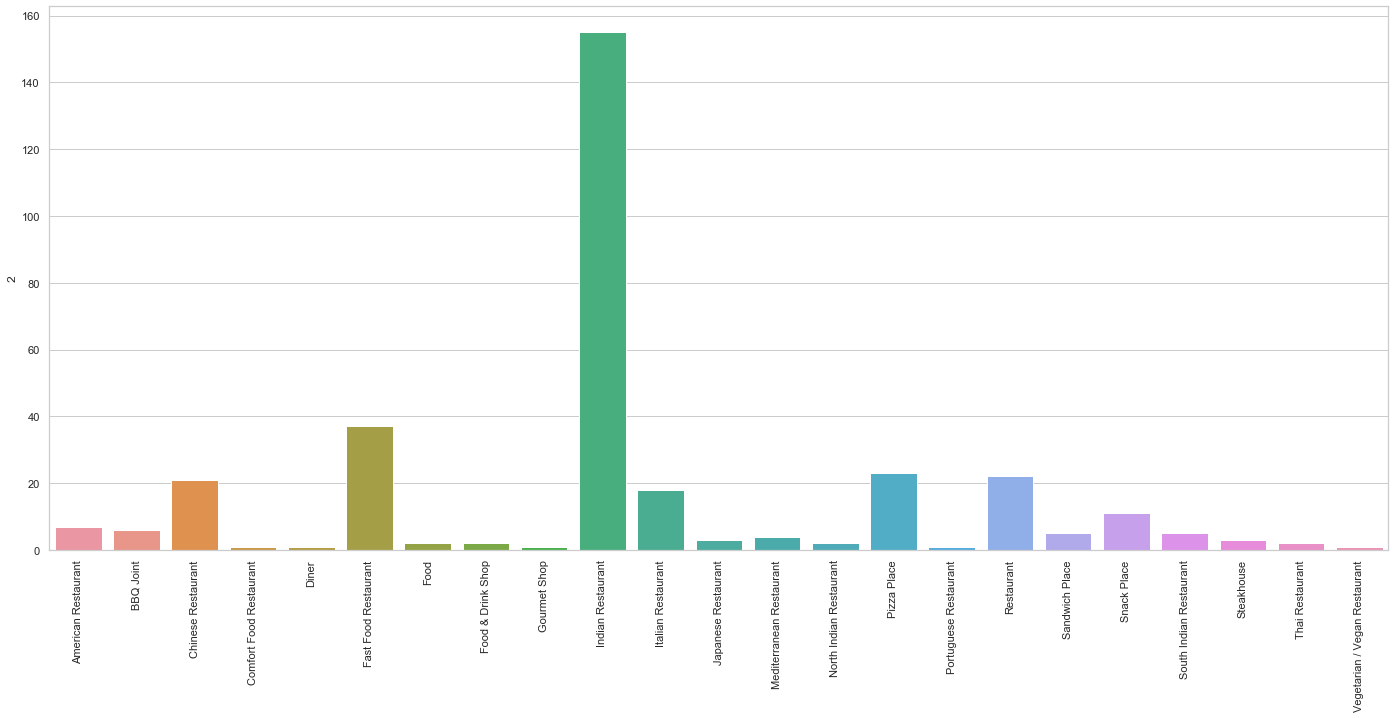

In [102]:
plot_bar(2)

From above visualisations, it is pretty evident that the clusters 1 and 2 are in high demand for Indian Restaurants, whereas the cluster 3 offers great competition to new Indian Restaurants as more than 150 venues are of Indian restaurants here.

So we will drop the places which belongs to cluster 3.

In [103]:
restaurants_merged.drop(restaurants_merged[restaurants_merged['Cluster_Labels'].isin(['2'])].index, inplace=True)
restaurants_merged.head()

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,North West Delhi,Azadpur,28.707657,77.175547,1,Restaurant,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant,BBQ Joint
3,North West Delhi,Dhaka,28.708000,77.205500,0,Pizza Place,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant,BBQ Joint
5,North West Delhi,Model Town,28.709500,77.188800,1,Chinese Restaurant,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Gourmet Shop
6,North West Delhi,Pitam Pura,28.703268,77.132250,1,Restaurant,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Gourmet Shop
8,North West Delhi,Rithala,28.720806,77.107181,1,Restaurant,Vegetarian / Vegan Restaurant,Gourmet Shop,American Restaurant,BBQ Joint


In [104]:
map_result = folium.Map(location =[latitude_DL, longitude_DL], zoom_start=11)
for lat, lng, neighborhood, borough in zip(restaurants_merged['latitude'], restaurants_merged['longitude'], restaurants_merged['Neighbourhood'], restaurants_merged['Borough']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.7,
    parse_html=False).add_to(map_result)  

map_result

## 5. Results and Discussions

From the above analysis, we have found some exciting results. We took 185 Neighbourhoods in Delhi into account to firstly, explore the Neighbourhoods of Delhi by looking into its venues and places across different Boroughs. Secondly, we narrowed our analysis to look into the food venues in Delhi and how the distribution of total venues affect the food venues around different Boroughs as well.

We observed that although 5 Boroughs out of 9 accounts for more than 70% of the population but the same cannot be said about how the venues are distributed in Delhi. South Delhi was the one Borough which held most of the venues and the same was inferred from Food joints as well as Indian Restaurants as well.

We also observe that cluster-3(blue), which includes most of the neighbourhoods, reflects that a considerable amount of neighbourhoods are similar in terms of the Venue categories and venues each of them offers.

Below are the most occuring venues in each venue cluster and how we might label each cluster as:
- Cluster-1 : Hotels
- Cluster-2 : Electronic and Mobile stores
- Cluster-3 : Multiple Venue categories
- Cluster-4 : ATMs
- Cluster-5 : Indian Restaurants

Below are the most occuring restaurants in restaurant cluster and how we might want to label them:
- Cluster-1 : Pizza Places
- Cluster-2 : Fast Food Restaurants
- Cluster-3 : Indian Restaurants


## 6. Conclusions

From this project, after analysing 9 Boroughs with 185 Neighbourhoods and 1500+ venues we can conclude the following points which certainly depends on the limitation of Foursquare exploration of venues as well as the limitation of some venues in Delhi which are either small-scale businesses or are unregistered due to various reasons.

The pointers are as below:
- South Delhi Borough is densely populated with venues and has a lot of competition for Indian Restaurants in comparison to other Boroughs

- Most Boroughs offers a variety of venue categories and have shown signs of similarities when compared in terms of clusters formed

- Cluster 3 is the most occuring cluster labels which contain multiple venues and indicates that most Neighbourhood are equipped with densely populated multiple venues, which in turns reflects Delhi's prosperity(2nd wealthiest city in India) as well as its high GDP per capita(2nd highest in India)

- The above map shows Neighbourhoods recommended by us for new Indian Restaurant in which we would further recommend Boroughs other than South Delhi, keeping in mind the population distribution in Delhi as well. Although, the large number of Indian Restaurants in South Delhi can also firmly mean that the restaurants here are a success, business wise, but we should keep in mind that it also offers a great amount of competition for new restaurants

- Also, we were successfully able to cluster food joints into broad categories i.e Pizza Places, Fast Food restaurants and Indian Restaurants which indicated the distribution of food joints all over Delhi.


----------------------------------------------------------------------------------------------The End-------------------------------------------------------------------------------------------------------